In [1]:
##General Imports
from sklearn import datasets
from sklearn import metrics
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sb
%matplotlib inline

pd.set_option('display.max_columns', 100)

In [2]:
##Imports 12 months of sampled cab data from a csv 
original_sample = pd.read_csv('Complete_Cab_Sample.csv')

In [3]:
##Creates a soft-copy of the data
data = original_sample.copy()
print data.columns

Index([u'Unnamed: 0', u'VendorID', u'tpep_pickup_datetime',
       u'tpep_dropoff_datetime', u'passenger_count', u'trip_distance',
       u'pickup_longitude', u'pickup_latitude', u'RatecodeID',
       u'store_and_fwd_flag', u'dropoff_longitude', u'dropoff_latitude',
       u'payment_type', u'fare_amount', u'extra', u'mta_tax', u'tip_amount',
       u'tolls_amount', u'improvement_surcharge', u'total_amount'],
      dtype='object')


In [4]:
data.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,6.920660e+05,692066.000000,692066.000000,692066.000000,692066.000000,692066.000000,692066.000000,692066.000000,692066.000000,692066.000000,692066.000000,692066.000000,692066.000000,692066.000000,692066.000000,692066.000000,692066.000000
mean,5.783023e+06,1.529811,1.672135,3.498712,-72.930167,40.175801,1.049224,-72.991990,40.210861,1.360697,12.994848,0.322814,0.497485,1.764804,0.320755,0.299712,16.200643
std,3.343144e+06,0.499111,1.320862,366.640983,8.723990,4.805677,1.012280,8.464925,4.662870,0.495253,11.123722,0.398701,0.039708,2.563337,1.609546,0.012296,13.662318
min,1.400000e+01,1.000000,0.000000,0.000000,-121.933266,0.000000,1.000000,-121.933304,0.000000,1.000000,-200.000000,-9.500000,-1.000000,-3.000000,-5.540000,-0.300000,-200.300000
25%,2.894586e+06,1.000000,1.000000,1.000000,-73.991859,40.735893,1.000000,-73.991280,40.734474,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.776661e+06,2.000000,1.000000,1.700000,-73.981628,40.753109,1.000000,-73.979675,40.753689,1.000000,9.500000,0.000000,0.500000,1.250000,0.000000,0.300000,11.800000
75%,8.660197e+06,2.000000,2.000000,3.200000,-73.966705,40.767735,1.000000,-73.962402,40.769024,2.000000,15.000000,0.500000,0.500000,2.360000,0.000000,0.300000,17.800000
max,1.231547e+07,2.000000,8.000000,300833.100000,0.000000,44.262245,99.000000,0.000000,44.990231,4.000000,650.000000,6.000000,10.300000,277.770000,555.000000,0.300000,650.300000


In [5]:
##Drops and counts trips with negative fares
print data.VendorID.count()
data_trim1 = data[data.fare_amount > 0]
print data_trim1.VendorID.count()
print data.VendorID.count() - data_trim1.VendorID.count(), "samples dropped due to non-positive fares"

692066
691603
463 samples dropped due to non-positive fares


In [6]:
##Convert to a dataframe
clean_sample = pd.DataFrame(data_trim1)

In [7]:
##Creates a tiprate variable
clean_sample['tiprate'] = clean_sample['tip_amount']/clean_sample['fare_amount']

In [8]:
##Drops and counts trips with tip rates over 100%
print clean_sample.VendorID.count()
clean_sample2 = clean_sample[clean_sample.tiprate < 1.00]
print clean_sample2.VendorID.count()
print clean_sample.VendorID.count() - clean_sample2.VendorID.count(), "samples dropped due to disproportionate tipping"

691603
690986
617 samples dropped due to disproportionate tipping


,tiprate
count,690986.000000
mean,0.135434
std,0.119255
min,0.000000
25%,0.000000
50%,0.166667
75%,0.226667
max,0.992701


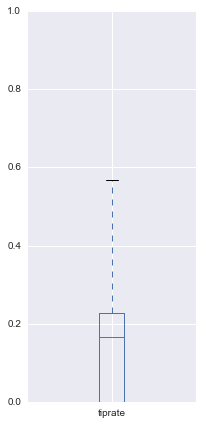

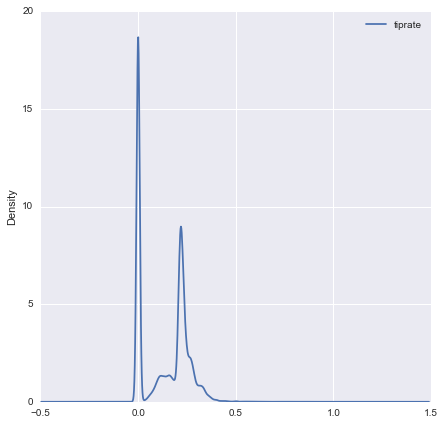

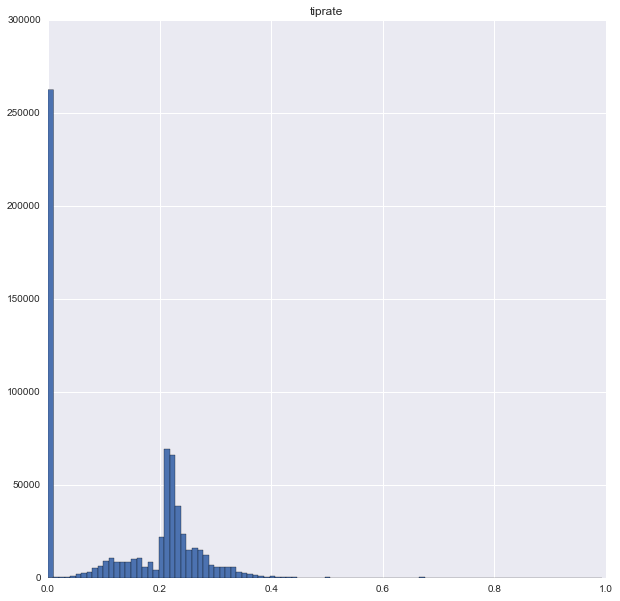

In [9]:
##Explores tiprate data
pd.DataFrame(clean_sample2['tiprate']).plot(kind='box', figsize=(3,7))
pd.DataFrame(clean_sample2['tiprate']).plot(kind='density', figsize=(7,7))
pd.DataFrame(clean_sample2['tiprate']).hist(bins=100, figsize=(10,10))
pd.DataFrame(clean_sample2['tiprate']).describe()

In [10]:
##Creates a dummy variable for zero_tip
def zero_tip(tiprate):
    if tiprate > 0.0:
        return 0
    else:
        return 1

clean_sample2['tiprate_zero'] = clean_sample2.tiprate.apply(zero_tip)
clean_sample2.head()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,tiprate,tiprate_zero
0,7178063,2,2016-01-29 21:21:32,2016-01-29 21:40:48,1,4.90,-74.002464,40.750145,1,N,-73.947334,40.783936,1,17.5,0.5,0.5,3.76,0.0,0.3,22.56,0.214857,0
1,5046424,2,2016-01-26 18:51:22,2016-01-26 19:06:08,1,1.49,-73.978333,40.763580,1,N,-73.960579,40.772720,2,10.5,1.0,0.5,0.00,0.0,0.3,12.30,0.000000,1
2,1926795,1,2016-01-09 19:38:48,2016-01-09 19:45:23,1,0.40,-73.991348,40.749607,1,N,-73.987312,40.747768,1,6.0,0.0,0.5,1.35,0.0,0.3,8.15,0.225000,0
3,10173838,2,2016-01-07 14:45:24,2016-01-07 14:48:38,2,0.60,-73.970222,40.762501,1,N,-73.964661,40.769970,2,4.5,0.0,0.5,0.00,0.0,0.3,5.30,0.000000,1
4,3320147,2,2016-01-16 16:17:13,2016-01-16 16:28:41,2,1.72,-73.984970,40.747353,1,N,-73.972977,40.765163,1,9.0,0.0,0.5,1.96,0.0,0.3,11.76,0.217778,0


In [11]:
##Create large, medium, and small tip categorical variables
def large_tip(tiprate):
    if tiprate >= .200:
        return 1
    else:
        return 0
    
clean_sample2['tiprate_large'] = clean_sample2.tiprate.apply(large_tip)
clean_sample2.head()


def small_tip(tiprate):
    if (tiprate > 0) and (tiprate <.10):
        return 1
    else:
        return 0

clean_sample2['tiprate_small'] = clean_sample2.tiprate.apply(small_tip)
clean_sample2.head()


def med_tip(tiprate):
    if (tiprate > .1) and (tiprate <.2):
        return 1
    else:
        return 0

clean_sample2['tiprate_med'] = clean_sample2.tiprate.apply(med_tip)
clean_sample2.head()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-c

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,tiprate,tiprate_zero,tiprate_large,tiprate_small,tiprate_med
0,7178063,2,2016-01-29 21:21:32,2016-01-29 21:40:48,1,4.90,-74.002464,40.750145,1,N,-73.947334,40.783936,1,17.5,0.5,0.5,3.76,0.0,0.3,22.56,0.214857,0,1,0,0
1,5046424,2,2016-01-26 18:51:22,2016-01-26 19:06:08,1,1.49,-73.978333,40.763580,1,N,-73.960579,40.772720,2,10.5,1.0,0.5,0.00,0.0,0.3,12.30,0.000000,1,0,0,0
2,1926795,1,2016-01-09 19:38:48,2016-01-09 19:45:23,1,0.40,-73.991348,40.749607,1,N,-73.987312,40.747768,1,6.0,0.0,0.5,1.35,0.0,0.3,8.15,0.225000,0,1,0,0
3,10173838,2,2016-01-07 14:45:24,2016-01-07 14:48:38,2,0.60,-73.970222,40.762501,1,N,-73.964661,40.769970,2,4.5,0.0,0.5,0.00,0.0,0.3,5.30,0.000000,1,0,0,0
4,3320147,2,2016-01-16 16:17:13,2016-01-16 16:28:41,2,1.72,-73.984970,40.747353,1,N,-73.972977,40.765163,1,9.0,0.0,0.5,1.96,0.0,0.3,11.76,0.217778,0,1,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117959990>]], dtype=object)

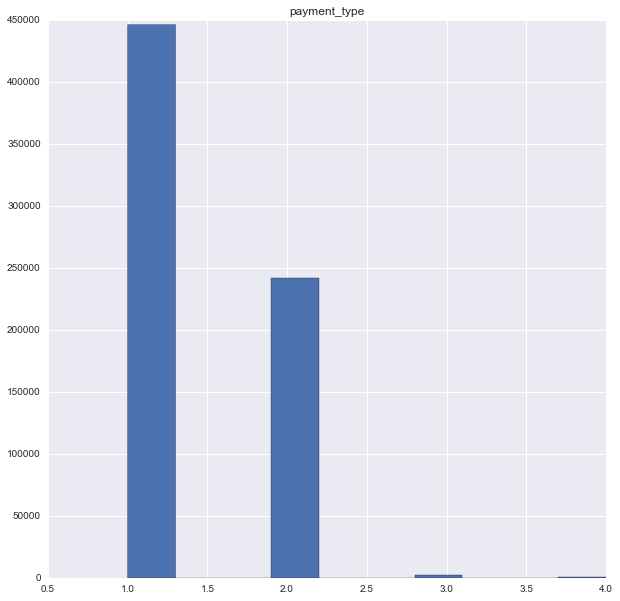

In [12]:
pd.DataFrame(clean_sample2['payment_type']).hist(figsize=(10,10))

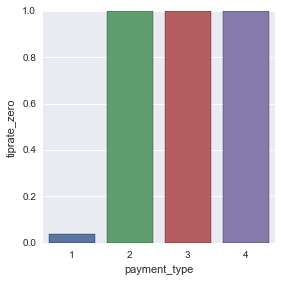

In [13]:
sb.factorplot(x='payment_type',y='tiprate_zero',data=clean_sample2,kind='bar')

In [14]:
##Limit dataset to Credit Card transactions only
print clean_sample2.passenger_count.count()
clean_sample3 = clean_sample2[clean_sample2.payment_type == 1.00]
print clean_sample3.passenger_count.count()
print clean_sample2.passenger_count.count() - clean_sample3.passenger_count.count(), "samples dropped due to non-positive fares"

690986
446032
244954 samples dropped due to non-positive fares


In [15]:
print clean_sample3[clean_sample3.trip_distance > 50].trip_distance.count()
clean_sample3 = clean_sample3[clean_sample3.trip_distance <= 50]

19


In [16]:
##Create datetime object based on string-based pickup timestamp

from datetime import datetime

def timeconvert(string):
    return datetime.strptime(string, '%Y-%m-%d %H:%M:%S')
    
clean_sample3['date_object'] = clean_sample3['tpep_pickup_datetime'].apply(timeconvert)

In [17]:
##Create month, year, weekday, and hour variables
clean_sample3['month'] = clean_sample3.date_object.apply(lambda x : x.month)
clean_sample3['year'] = clean_sample3.date_object.apply(lambda x : x.year)
clean_sample3['weekday'] = clean_sample3.date_object.apply(lambda x : x.weekday())
clean_sample3['hour'] = clean_sample3.date_object.apply(lambda x : x.hour)

clean_sample3.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,tiprate,tiprate_zero,tiprate_large,tiprate_small,tiprate_med,date_object,month,year,weekday,hour
0,7178063,2,2016-01-29 21:21:32,2016-01-29 21:40:48,1,4.90,-74.002464,40.750145,1,N,-73.947334,40.783936,1,17.5,0.5,0.5,3.76,0.0,0.3,22.56,0.214857,0,1,0,0,2016-01-29 21:21:32,1,2016,4,21
2,1926795,1,2016-01-09 19:38:48,2016-01-09 19:45:23,1,0.40,-73.991348,40.749607,1,N,-73.987312,40.747768,1,6.0,0.0,0.5,1.35,0.0,0.3,8.15,0.225000,0,1,0,0,2016-01-09 19:38:48,1,2016,5,19
4,3320147,2,2016-01-16 16:17:13,2016-01-16 16:28:41,2,1.72,-73.984970,40.747353,1,N,-73.972977,40.765163,1,9.0,0.0,0.5,1.96,0.0,0.3,11.76,0.217778,0,1,0,0,2016-01-16 16:17:13,1,2016,5,16
5,4977713,1,2016-01-11 16:33:40,2016-01-11 16:39:51,2,0.60,-73.959503,40.776993,1,N,-73.953049,40.771721,1,6.0,1.0,0.5,2.30,0.0,0.3,10.10,0.383333,0,1,0,0,2016-01-11 16:33:40,1,2016,0,16
6,7310645,1,2016-01-30 03:22:48,2016-01-30 04:00:13,1,18.20,-73.956367,40.771473,1,N,-73.750702,40.674465,1,53.0,0.5,0.5,10.85,0.0,0.3,65.15,0.204717,0,1,0,0,2016-01-30 03:22:48,1,2016,5,3


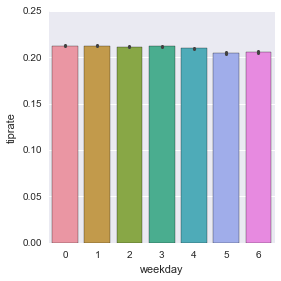

In [18]:
sb.factorplot(x='weekday',y='tiprate',data=clean_sample3,kind='bar')

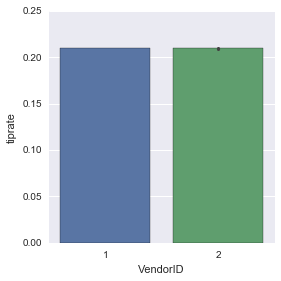

In [19]:
sb.factorplot(x='VendorID',y='tiprate',data=clean_sample3,kind='bar')

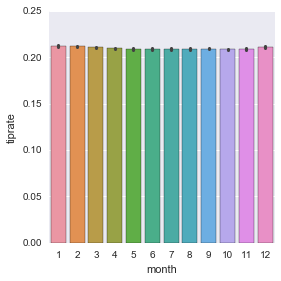

In [20]:
sb.factorplot(x='month',y='tiprate',data=clean_sample3,kind='bar')

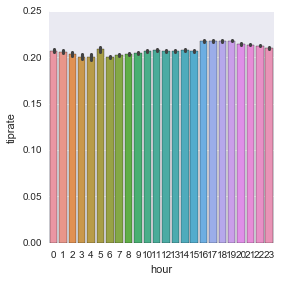

In [21]:
sb.factorplot(x='hour',y='tiprate',data=clean_sample3,kind='bar')

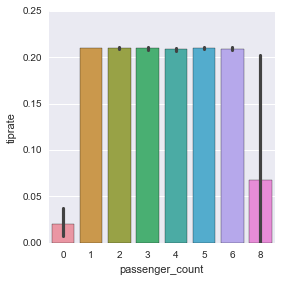

In [22]:
sb.factorplot(x='passenger_count',y='tiprate',data=clean_sample3,kind='bar')

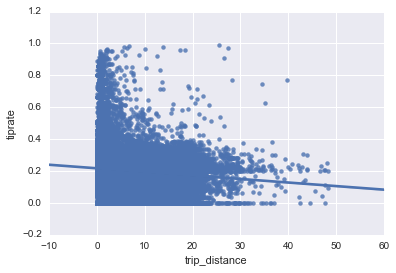

In [23]:
sb.regplot(x='trip_distance',y='tiprate',data=clean_sample3)

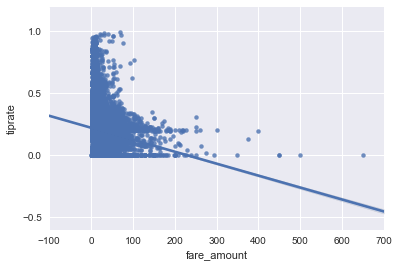

In [24]:
sb.regplot(x='fare_amount',y='tiprate',data=clean_sample3)

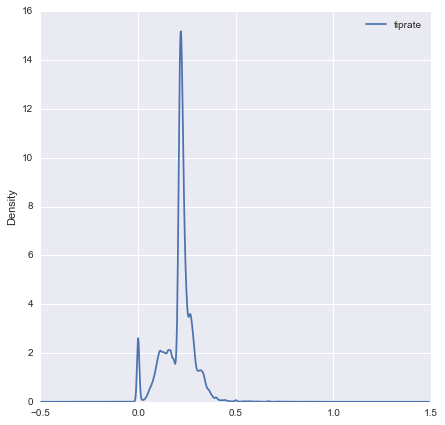

In [25]:
pd.DataFrame(clean_sample3['tiprate']).plot(kind='density', figsize=(7,7))

In [ ]:
###Explores the outcome variable "tiprate_zero", where someone tips zero dollars in a cab

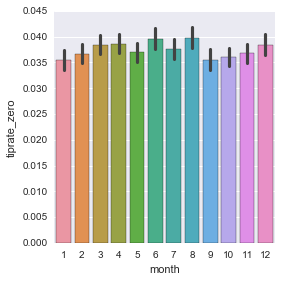

In [26]:
sb.factorplot(x='month',y='tiprate_zero',data=clean_sample3,kind='bar')

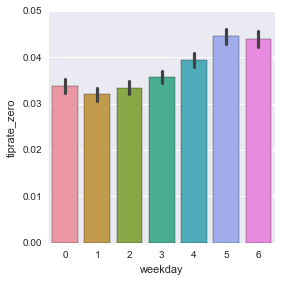

In [27]:
sb.factorplot(x='weekday',y='tiprate_zero',data=clean_sample3,kind='bar')

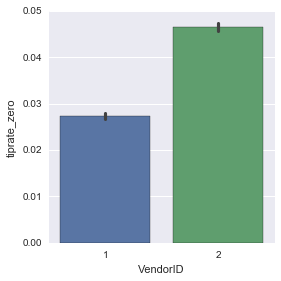

In [28]:
sb.factorplot(x='VendorID',y='tiprate_zero',data=clean_sample3,kind='bar')

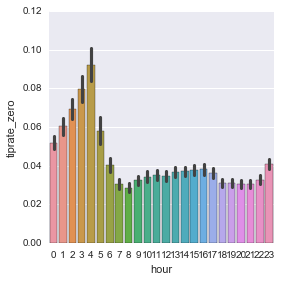

In [29]:
sb.factorplot(x='hour',y='tiprate_zero',data=clean_sample3,kind='bar')

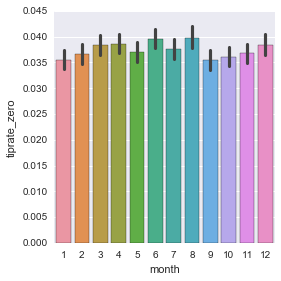

In [33]:
sb.factorplot(x='month',y='tiprate_zero',data=clean_sample3,kind='bar')

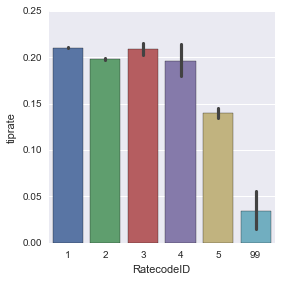

In [32]:
sb.factorplot(x='RatecodeID',y='tiprate',data=clean_sample3,kind='bar')

In [31]:
clean_sample3['RatecodeID'].value_counts()

1     433035
2      10319
5       1578
3        866
4        154
99        61
Name: RatecodeID, dtype: int64

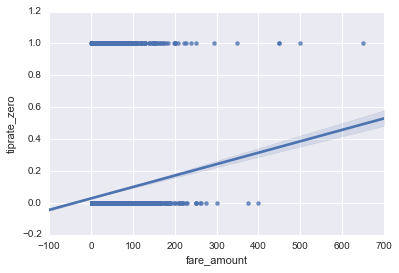

In [31]:
sb.regplot(x='fare_amount',y='tiprate_zero',data=clean_sample3)

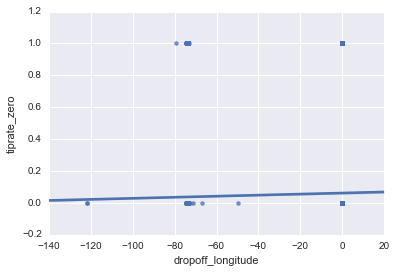

In [42]:
sb.regplot(x='dropoff_longitude',y='tiprate_zero',data=clean_sample3)

In [ ]:
###Explores the outcome variable "tiprate_large", i.e. a tip greater than 20%

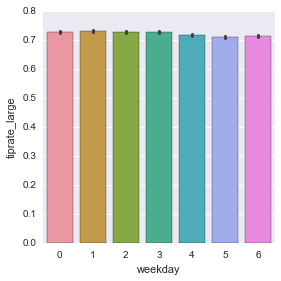

In [32]:
sb.factorplot(x='weekday',y='tiprate_large',data=clean_sample3,kind='bar')

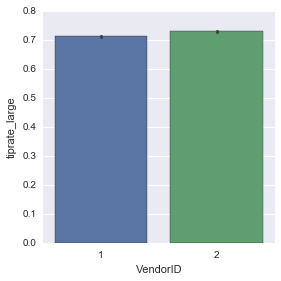

In [33]:
sb.factorplot(x='VendorID',y='tiprate_large',data=clean_sample3,kind='bar')

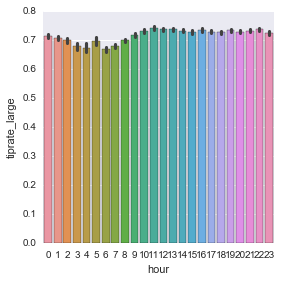

In [34]:
sb.factorplot(x='hour',y='tiprate_large',data=clean_sample3,kind='bar')

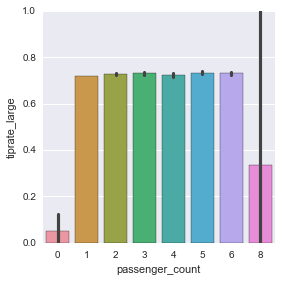

In [35]:
sb.factorplot(x='passenger_count',y='tiprate_large',data=clean_sample3,kind='bar')

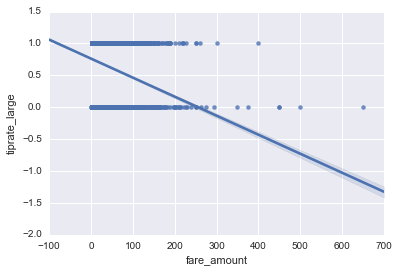

In [36]:
sb.regplot(x='fare_amount',y='tiprate_large',data=clean_sample3)

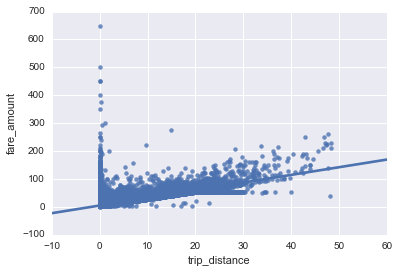

In [37]:
sb.regplot(x='trip_distance',y='fare_amount',data=clean_sample3)

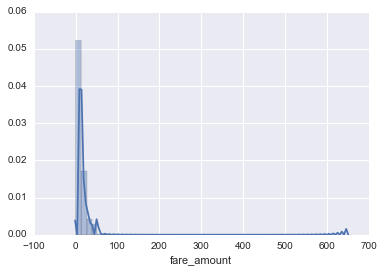

In [41]:
sb.distplot(clean_sample3.fare_amount)

In [47]:
## Get dummies for weekday
clean_sample_dummies = pd.get_dummies(clean_sample3,prefix=None,columns=["weekday"],drop_first=True)
clean_sample_dummies.columns

Index([u'Unnamed: 0', u'VendorID', u'tpep_pickup_datetime',
       u'tpep_dropoff_datetime', u'passenger_count', u'trip_distance',
       u'pickup_longitude', u'pickup_latitude', u'RatecodeID',
       u'store_and_fwd_flag', u'dropoff_longitude', u'dropoff_latitude',
       u'payment_type', u'fare_amount', u'extra', u'mta_tax', u'tip_amount',
       u'tolls_amount', u'improvement_surcharge', u'total_amount', u'tiprate',
       u'tiprate_zero', u'tiprate_large', u'tiprate_small', u'tiprate_med',
       u'date_object', u'month', u'year', u'hour', u'weekday_1', u'weekday_2',
       u'weekday_3', u'weekday_4', u'weekday_5', u'weekday_6'],
      dtype='object')

In [48]:
## Get dummy for tech provider
clean_sample_dummies = pd.get_dummies(clean_sample_dummies,prefix=None,columns=["VendorID"],drop_first=True)
clean_sample_dummies.columns

Index([u'Unnamed: 0', u'tpep_pickup_datetime', u'tpep_dropoff_datetime',
       u'passenger_count', u'trip_distance', u'pickup_longitude',
       u'pickup_latitude', u'RatecodeID', u'store_and_fwd_flag',
       u'dropoff_longitude', u'dropoff_latitude', u'payment_type',
       u'fare_amount', u'extra', u'mta_tax', u'tip_amount', u'tolls_amount',
       u'improvement_surcharge', u'total_amount', u'tiprate', u'tiprate_zero',
       u'tiprate_large', u'tiprate_small', u'tiprate_med', u'date_object',
       u'month', u'year', u'hour', u'weekday_1', u'weekday_2', u'weekday_3',
       u'weekday_4', u'weekday_5', u'weekday_6', u'VendorID_2'],
      dtype='object')

In [49]:
##Create dummies for hours
clean_sample_dummies = pd.get_dummies(clean_sample_dummies,prefix=None,columns=["hour"],drop_first=True)
clean_sample_dummies.columns
clean_sample_dummies.head()

,Unnamed: 0,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,tiprate,tiprate_zero,tiprate_large,tiprate_small,tiprate_med,date_object,month,year,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,VendorID_2,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,7178063,2016-01-29 21:21:32,2016-01-29 21:40:48,1,4.90,-74.002464,40.750145,1,N,-73.947334,40.783936,1,17.5,0.5,0.5,3.76,0.0,0.3,22.56,0.214857,0,1,0,0,2016-01-29 21:21:32,1,2016,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1926795,2016-01-09 19:38:48,2016-01-09 19:45:23,1,0.40,-73.991348,40.749607,1,N,-73.987312,40.747768,1,6.0,0.0,0.5,1.35,0.0,0.3,8.15,0.225000,0,1,0,0,2016-01-09 19:38:48,1,2016,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3320147,2016-01-16 16:17:13,2016-01-16 16:28:41,2,1.72,-73.984970,40.747353,1,N,-73.972977,40.765163,1,9.0,0.0,0.5,1.96,0.0,0.3,11.76,0.217778,0,1,0,0,2016-01-16 16:17:13,1,2016,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4977713,2016-01-11 16:33:40,2016-01-11 16:39:51,2,0.60,-73.959503,40.776993,1,N,-73.953049,40.771721,1,6.0,1.0,0.5,2.30,0.0,0.3,10.10,0.383333,0,1,0,0,2016-01-11 16:33:40,1,2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7310645,2016-01-30 03:22:48,2016-01-30 04:00:13,1,18.20,-73.956367,40.771473,1,N,-73.750702,40.674465,1,53.0,0.5,0.5,10.85,0.0,0.3,65.15,0.204717,0,1,0,0,2016-01-30 03:22:48,1,2016,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
##Create dummies for months
clean_sample_dummies = pd.get_dummies(clean_sample_dummies,prefix=None,columns=["month"],drop_first=True)
clean_sample_dummies.columns
clean_sample_dummies.head()

,Unnamed: 0,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,tiprate,tiprate_zero,tiprate_large,tiprate_small,tiprate_med,date_object,year,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,VendorID_2,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,7178063,2016-01-29 21:21:32,2016-01-29 21:40:48,1,4.90,-74.002464,40.750145,1,N,-73.947334,40.783936,1,17.5,0.5,0.5,3.76,0.0,0.3,22.56,0.214857,0,1,0,0,2016-01-29 21:21:32,2016,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1926795,2016-01-09 19:38:48,2016-01-09 19:45:23,1,0.40,-73.991348,40.749607,1,N,-73.987312,40.747768,1,6.0,0.0,0.5,1.35,0.0,0.3,8.15,0.225000,0,1,0,0,2016-01-09 19:38:48,2016,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3320147,2016-01-16 16:17:13,2016-01-16 16:28:41,2,1.72,-73.984970,40.747353,1,N,-73.972977,40.765163,1,9.0,0.0,0.5,1.96,0.0,0.3,11.76,0.217778,0,1,0,0,2016-01-16 16:17:13,2016,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4977713,2016-01-11 16:33:40,2016-01-11 16:39:51,2,0.60,-73.959503,40.776993,1,N,-73.953049,40.771721,1,6.0,1.0,0.5,2.30,0.0,0.3,10.10,0.383333,0,1,0,0,2016-01-11 16:33:40,2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7310645,2016-01-30 03:22:48,2016-01-30 04:00:13,1,18.20,-73.956367,40.771473,1,N,-73.750702,40.674465,1,53.0,0.5,0.5,10.85,0.0,0.3,65.15,0.204717,0,1,0,0,2016-01-30 03:22:48,2016,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
##Rename Columns
clean_sample_dummies.columns = ['original_row_value', 'pickup_time', 'dropoff_time', 'passenger_count', 'trip_distance', 'pickup_longitude', 'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'tiprate', 'tiprate_zero', 'date_object', 'month', 'year', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Verifone', 'tiprate_large', 'tiprate_small', 'tiprate_medium', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'October', 'November', 'December']
clean_sample_dummies.head()

,original_row_value,pickup_time,dropoff_time,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,tiprate,tiprate_zero,date_object,month,year,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Verifone,tiprate_large,tiprate_small,tiprate_medium,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,February,March,April,May,June,July,August,October,November,December
0,7178063,2016-01-29 21:21:32,2016-01-29 21:40:48,1,4.90,-74.002464,40.750145,1,N,-73.947334,40.783936,1,17.5,0.5,0.5,3.76,0.0,0.3,22.56,0.214857,0,1,0,0,2016-01-29 21:21:32,2016,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1926795,2016-01-09 19:38:48,2016-01-09 19:45:23,1,0.40,-73.991348,40.749607,1,N,-73.987312,40.747768,1,6.0,0.0,0.5,1.35,0.0,0.3,8.15,0.225000,0,1,0,0,2016-01-09 19:38:48,2016,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3320147,2016-01-16 16:17:13,2016-01-16 16:28:41,2,1.72,-73.984970,40.747353,1,N,-73.972977,40.765163,1,9.0,0.0,0.5,1.96,0.0,0.3,11.76,0.217778,0,1,0,0,2016-01-16 16:17:13,2016,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4977713,2016-01-11 16:33:40,2016-01-11 16:39:51,2,0.60,-73.959503,40.776993,1,N,-73.953049,40.771721,1,6.0,1.0,0.5,2.30,0.0,0.3,10.10,0.383333,0,1,0,0,2016-01-11 16:33:40,2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7310645,2016-01-30 03:22:48,2016-01-30 04:00:13,1,18.20,-73.956367,40.771473,1,N,-73.750702,40.674465,1,53.0,0.5,0.5,10.85,0.0,0.3,65.15,0.204717,0,1,0,0,2016-01-30 03:22:48,2016,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
clean_sample_dummies.describe()

,original_row_value,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,tiprate,tiprate_zero,date_object,month,year,Wednesday,Thursday,Friday,Saturday,Sunday,Verifone,tiprate_large,tiprate_small,tiprate_medium,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,February,March,April,May,June,July,August,October,November,December
count,4.460320e+05,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.0,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000
mean,5.767092e+06,1.653675,3.264107,-72.958350,40.190395,1.055722,-73.097675,40.267660,1.0,13.524424,0.329114,0.497724,2.713654,0.366479,0.299947,17.731638,0.209811,0.037509,0.721968,0.050218,0.183987,2015.515530,0.142546,0.150547,0.153944,0.149536,0.144263,0.130457,0.530675,0.028254,0.020398,0.014317,0.009990,0.009753,0.022987,0.039995,0.049902,0.047521,0.043804,0.043714,0.046506,0.045746,0.047263,0.045638,0.040775,0.049263,0.061464,0.063659,0.061361,0.061092,0.058339,0.049588,0.085588,0.091032,0.089458,0.086846,0.082061,0.080167,0.076474,0.078458,0.087680,0.081019,0.080671
std,3.331677e+06,1.315849,75.307653,8.610402,4.742855,1.183816,8.006802,4.410031,0.0,11.420139,0.398768,0.036867,2.522237,1.508989,0.003992,14.528798,0.080168,0.190005,0.448030,0.218395,0.387474,0.499759,0.349609,0.357608,0.360896,0.356617,0.351357,0.336806,0.499059,0.165697,0.141356,0.118796,0.099451,0.098273,0.149863,0.195947,0.217743,0.212751,0.204659,0.204459,0.210578,0.208933,0.212202,0.208699,0.197769,0.216417,0.240180,0.244145,0.239992,0.239499,0.234383,0.217093,0.279755,0.287654,0.285404,0.281609,0.274459,0.271552,0.265756,0.268892,0.282829,0.272864,0.272330
min,1.400000e+01,0.000000,0.000000,-121.933266,0.000000,1.000000,-121.933304,0.000000,1.0,0.010000,-9.500000,0.000000,0.000000,0.000000,0.000000,0.310000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.899359e+06,1.000000,1.100000,-73.992378,40.734749,1.000000,-73.991760,40.733105,1.0,7.000000,0.000000,0.500000,1.350000,0.000000,0.300000,9.360000,0.181818,0.000000,0.000000,0.000000,0.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.754754e+06,1.000000,1.810000,-73.981987,40.752022,1.000000,-73.980148,40.752304,1.0,10.000000,0.000000,0.500000,2.000000,0.000000,0.300000,12.960000,0.219459,0.000000,1.000000,0.000000,0.000

In [ ]:
##clean_sample_dummies.to_csv("Full_Processed_Sample")